# Experiment with NLP Techniques for Political texts

In [18]:
import pandas as pd
import re
import string
import nltk
nltk.download('stopwords') 
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/derekwu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/derekwu/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/derekwu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
person = 'JoeBiden'

In [40]:
data = pd.read_csv('filename',sep='\t')

In [41]:
def preprocess_text(text): 
    # Convert text to lowercase 
    text = text.lower()

    # Remove special characters and digits using regular expressions
    text= re.sub(r'\d+', '', text) 
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    return tokens

def remove_stopwords(tokens): 
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words] 
    return filtered_tokens

def perform_lemmatization(tokens): 
    lemmatizer = nltk.WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens


def clean_text(text): 
    tokens = preprocess_text(text)
    filtered_tokens = remove_stopwords(tokens)
    lemmatized_tokens = perform_lemmatization(filtered_tokens)
    clean_text = ' '.join(lemmatized_tokens)
    return clean_text

In [42]:
data['CleanText'] = data['CleanText'].map(clean_text)

In [43]:
corpus = ','.join(list(data['CleanText'].values))

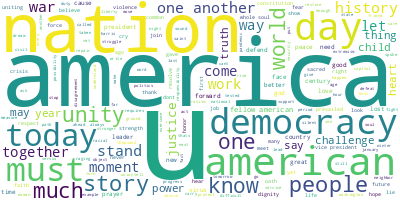

In [44]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(corpus)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
## Frequency counts
## Coorelation of words (be able to search specific words) 
## Word connection graph? 
## Topic modeling -> is there anything better? 